In [1]:
s = 'ACGT'
print(len(s))

4


In [2]:
s = 'AACC'
t = 'GGTT'
print(s + t)

AACCGGTT


In [6]:
s = 'ACCGGTT'
print(s[0:6])
print(s[:6])

ACCGGT
ACCGGT


In [17]:
s = 'AACCGGTT'
print(s[4:8])
print(s[-4:])

GGTT
GGTT


In [9]:
seq = 'ACGT'

In [10]:
seq = "ACGT"

In [11]:
seq[1]

'C'

In [12]:
len(seq)

4

In [13]:
e = ''

In [14]:
len(e)

0

In [15]:
seq1 = 'CCAA'
seq2 = 'GGTT'
print(seq1 + seq2)

CCAAGGTT


In [18]:
seqs = ['A', 'C', 'G', 'T']
print(''.join(seqs))

ACGT


In [19]:
seqs = ['A', 'C', 'G', 'T']
print(','.join(seqs))

A,C,G,T


In [23]:
import random
random.choice('ACGT')

'A'

In [25]:
import random
random.seed(7) # same behavior each time
random.choice('ACGT')

'G'

In [28]:
seq = ''
for _ in range(10):
    seq += random.choice('ACGT')
print(seq)

TACACGTCAG


In [31]:
seq = ''.join([random.choice('ACGT') for _ in range(10)])
print(seq)

TGTGAATCGC


In [32]:
seq[1:3]

'GT'

In [33]:
seq[:3]

'TGT'

In [34]:
seq[0:3]

'TGT'

In [35]:
seq[7:]

'CGC'

In [36]:
seq[7:len(seq)]

'CGC'

In [37]:
seq[-2]

'G'

In [38]:
seq[-4]

'T'

In [39]:
def longestCommonPrefix(s1, s2):
    i = 0
    while i < len(s1) and i < len(s2) and s1[i] == s2[i]:
        i += 1
    return s1[:i]
longestCommonPrefix('ACCAGTC', 'ACCATTG')

'ACCA'

In [40]:
def match(s1, s2):
    if not len(s1) == len(s2):
        return False
    for i in range(len(s1)):
        if not s1[i] == s2[i]:
            return False
    return True
match('ACCA', 'ACCA')

True

In [41]:
match('ACGT', 'ACGG')

False

In [42]:
'ACGT' == 'ACGG'

False

In [43]:
'ACCA' == 'ACCA'

True

In [47]:
complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
print(complement['G'])

C


In [49]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t
reverseComplement('AGGCC')

'GGCCT'

In [50]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2019-09-01 14:19:04--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.224.42.83, 13.224.42.229, 13.224.42.15, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.224.42.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa’

lambda_virus.fa     100%[===================>]  48.12K  --.-KB/s    in 0.08s   

2019-09-01 14:19:04 (573 KB/s) - ‘lambda_virus.fa’ saved [49270/49270]



In [51]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [52]:
genome = readGenome('lambda_virus.fa')

In [53]:
print(genome[:100])

GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC


In [54]:
len(genome)

48502

In [55]:
counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0 }
for base in genome:
    counts[base] += 1
print(counts)

{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986}


In [56]:
import collections
collections.Counter(genome)

Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

In [123]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

def read_FAST_A(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

genome = read_FAST_A('lambda_virus.fa')
print(genome)

GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGGATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCTCCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAGAATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTGAAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCGGGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGCTCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAATCCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGGCAGCGACTACATCCGTGAGGTGAATGTGGTGAAGTCTGCCCGTGTCGGTTATTCCAAAATGCTGCTGGGTGTTTATGCCTACTTTATAGAGCATAA

In [82]:
question1 = '''1. How many times does AGGT or its reverse complement (ACCT) occur in the lambda virus genome?
E.g. if AGGT occurs 10 times and ACCT occurs 12 times, you should report 22.'''
print(question1)

1. How many times does AGGT or its reverse complement (ACCT) occur in the lambda virus genome?
E.g. if AGGT occurs 10 times and ACCT occurs 12 times, you should report 22.


In [73]:
count = 0
count += len(naive('AGGT', genome))
count += len(naive(reverseComplement('AGGT'), genome))
print(count)

306


In [83]:
question2 = '''2. How many times does TTAA or its reverse complement occur in the labda virus genome?
Hint: TTAA and its reverse complement are equal, so remember to not double count'''
print(question2)

2. How many times does TTAA or its reverse complement occur in the labda virus genome?
Hint: TTAA and its reverse complement are equal, so remember to not double count


In [75]:
count = len(naive('TTAA', genome))
print(count)

195


In [84]:
question3 = '''What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement
in the Lambda virus genome? E.g. if the leftmost occurrence of ACTAAGT is at offset 40 (0-based)
and the leftmost occurrence of its reverse complement ACTTAGT is at offset 29, then report 29.'''
print(question3)

What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement
in the Lambda virus genome? E.g. if the leftmost occurrence of ACTAAGT is at offset 40 (0-based)
and the leftmost occurrence of its reverse complement ACTTAGT is at offset 29, then report 29.


In [90]:
s = 'abcdefghijklmnopqrstuvwxyz'
print(s)
for i in range(len(s)):
    print(i % 10, end='')
    

abcdefghijklmnopqrstuvwxyz
01234567890123456789012345

In [92]:
s.rfind('tuv')

19

In [100]:
needle = 'ACTAAGT'
offset1 = genome.rfind(needle)
offset2 = genome.rfind(reverseComplement(needle))
print('offset1: %d    offset2: %d' % (offset1, offset2))
print(min(offset1, offset2))

offset1: 45382    offset2: 26028
26028


In [105]:
question4 = '''What is the offset of the leftmost occurrence of AGTCGA or its reverse complement
in the Lambda virus genome?'''
print(question4)

What is the offset of the leftmost occurrence of AGTCGA or its reverse complement
in the Lambda virus genome?


In [153]:
needle = 'AGTCGA'
offset1 = genome.find(needle)
offset2 = genome.find(reverseComplement(needle))
print('offset1: %d    offset2: %d' % (offset1, offset2))
print(min(offset1, offset2))

offset1: 18005    offset2: 450
450


In [110]:
question5 = '''As we will discuss, sometimes we would like to find approximate matches for P in T.
That is, we want to find occurrences with one or more differences.

For Questions 5 and 6, make a new version of the naive function called naive_2mm
that allows up to 2 mismatches per occurrence. Unlike for the previous questions,
do not consider the reverse complement here. We're looking for approximate matches for P itself,
not its reverse complement.

For example, ACTTTA occurs twice in ACTTACTTGATAAAGT, once at offset 0 with 2 mismatches,
and once at offset 4 with 1 mismatch. So naive_2mm(’ACTTTA’,’ACTTACTTGATAAAGT’)
should return the list [0,4].

How many times does TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches?'''
print(question5)

As we will discuss, sometimes we would like to find approximate matches for P in T.
That is, we want to find occurrences with one or more differences.

For Questions 5 and 6, make a new version of the naive function called naive_2mm
that allows up to 2 mismatches per occurrence. Unlike for the previous questions,
do not consider the reverse complement here. We're looking for approximate matches for P itself,
not its reverse complement.

For example, ACTTTA occurs twice in ACTTACTTGATAAAGT, once at offset 0 with 2 mismatches,
and once at offset 4 with 1 mismatch. So naive_2mm(’ACTTTA’,’ACTTACTTGATAAAGT’)
should return the list [0,4].

How many times does TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches?


In [113]:
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        mismatch = 0
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                mismatch += 1
                if mismatch > 2:
                    break
        if mismatch <= 2:
            occurrences.append(i)  # all chars matched; record
    return occurrences
naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT')

[0, 4]

In [112]:
count = len(naive_2mm('TTCAAGCC', genome))
print(count)

191


In [114]:
question6 = '''What is the offset of the leftmost occurrence of AGGAGGTT
in the Lambda virus genome when allowing up to 2 mismatches?'''
print(question6)

What is the offset of the leftmost occurrence of AGGAGGTT
in the Lambda virus genome when allowing up to 2 mismatches?


In [154]:
offsets = naive_2mm('AGGAGGTT', genome)
print(offsets[0])

49


In [120]:
question7 = '''Finally, download and parse the provided FASTQ file containing real DNA sequencing reads
derived from a human:

https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

Note that the file has many reads in it and you should examine all of them together when answering this question.
The reads are taken from this study:

Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate

and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505.

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem. Remember that a sequencing cycle corresponds
to a particular offset in all the reads. For example, if the leftmost read position seems
to have a problem consistently across reads, report 0. If the fourth position from the left has the problem,
report 3. Do whatever analysis you think is needed to identify the bad cycle.
It might help to review the "Analyzing reads by position" video.'''
print(question7)

Finally, download and parse the provided FASTQ file containing real DNA sequencing reads
derived from a human:

https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

Note that the file has many reads in it and you should examine all of them together when answering this question.
The reads are taken from this study:

Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate

and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505.

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem. Remember that a sequencing cycle corresponds
to a particular offset in all the reads. For example, if the leftmost read position seems
to have a problem consistently across reads, report 0. If the fourth position from the left has the problem,
report 3. Do whatever analysis you think is needed to identify the bad cycle.
It might help to 

In [119]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2019-09-01 15:19:42--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.224.42.229, 13.224.42.15, 13.224.42.150, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.224.42.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq.1’

ERR037900_1.first10 100%[===================>] 235.96K  --.-KB/s    in 0.07s   

2019-09-01 15:19:42 (3.35 MB/s) - ‘ERR037900_1.first1000.fastq.1’ saved [241626/241626]



In [130]:
def read_FAST_Q(filename):
    sequences = []
    qualities = []
    with open(filename, 'r') as f:
        while True:
            f.readline()
            seq = f.readline().rstrip()
            f.readline()
            qual = f.readline().rstrip()
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities


In [129]:
seq, qual = read_FAST_Q('ERR037900_1.first1000.fastq')
print(seq[:5])
print(qual[:5])
print(len(seq[0]))

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTNACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTACC', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAAACCTAACC']
['HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHEHHBA#C>@54455C/7=CGHEGEB;C############', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGHHHHHHHHHHHHHDHHHDEHHHHFGIHEHEGGGF4#45655366GIGEHAGBG################', 'HHHHHHHHHHHHHHHHHHHHHHHHHIHHHHHHHHHHHHHHHHHHHHHHIHHHHHIHFHHHIHHHHD#ECA54655GGIBH?BD@+BCBF?5A=::>8?##', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHIHEHHIGHIFFH

In [135]:
def QtoPhred33(Q):
    '''Turn Q into Phred+33 ASCII-­‐encoded quality'''
    return chr(Q + 33) # converts character to integer according to ASCII table

def phred33ToQ(qual):
    '''Turn Phred+33 ASCII-encoded quality into Q'''
    return ord(qual) - 33 # converts integer to character according to ASCII table

def createHistory(qualities):
    history = [0] * 50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            history[q] += 1
    return history
h = createHistory(qual)
print(h)

[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0]


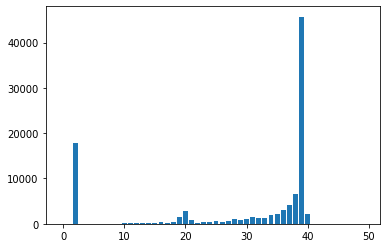

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()

In [138]:
print(QtoPhred33(2))

#


In [169]:
import collections

def maxPoorQualitySequencingCycle(qualities):
    min_score = 123456789
    min_index = -1
    for i, qual in enumerate(qualities):
        score = sum(map(ord, qual))
        if min_score > score:
            min_score = score
            min_index = i
    return min_index

In [174]:
offset = maxPoorQualitySequencingCycle(qual)
print("incorrect answer: %d" % offset)

incorrect answer: 111


In [172]:
print("well this was my best guess...\n" + qual[111])

well this was my best guess...
A@A@A9@?>A45555@@46?54/5/554+588<<8FCBF#############################################################
